# Árboles de Decisión Aplicado al Dataset Iris

**Objetivo:**
El objetivo de este notebook es construir, entrenar y visualizar un modelo de árbol de decisión para clasificar las especies de flores del dataset Iris. Se explorarán las características del dataset, se entrenará el clasificador, se evaluará su precisión, se generarán las reglas de decisión y se analizará un ejemplo específico.

## 1. Carga de Librerías y Configuración Inicial

**Propósito de esta sección:**
Importar todas las bibliotecas necesarias y configurar el entorno para el análisis.

**Bibliotecas Clave:**
* **`numpy`**: Para operaciones numéricas.
* **`pandas`**: Para manipulación y análisis de datos (DataFrames).
* **`matplotlib.pyplot`**: Para la creación de gráficos estáticos.
* **`seaborn`**: Para visualizaciones estadísticas más atractivas.
* **`sklearn.datasets`**: Para cargar datasets de ejemplo como Iris.
* **`sklearn.model_selection`**: Para dividir datos en conjuntos de entrenamiento y prueba.
* **`sklearn.tree`**: Contiene las clases y funciones para árboles de decisión (`DecisionTreeClassifier`, `export_text`, `plot_tree`).

**Configuraciones Adicionales:**
* `%load_ext autoreload` y `%autoreload 2`: Comandos mágicos de IPython para recargar módulos automáticamente antes de ejecutar código (útil durante el desarrollo).
* `%matplotlib inline`: Para mostrar gráficos de Matplotlib directamente en la salida del notebook.
* `sns.set(style="whitegrid")`: Establece un estilo visual agradable para los gráficos de Seaborn.
* `plt.rcParams`: Se utiliza para configurar globalmente parámetros de los gráficos de Matplotlib, como el tamaño de figura y la resolución.

In [1]:
# Comandos mágicos de IPython para recarga automática de módulos (opcional).
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Mostrar gráficos de Matplotlib inline en el notebook.
%matplotlib inline

In [2]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Establecer estilo de seaborn para los gráficos.
sns.set(style="whitegrid")

In [3]:
# Configuración global de los gráficos de matplotlib.
plt.rcParams['figure.figsize'] = [10, 6]  # Tamaño de figura por defecto (ancho, alto) en pulgadas.
plt.rcParams['figure.dpi'] = 100  # Resolución en puntos por pulgada (DPI).
plt.rcParams['font.size'] = 12 # Tamaño de fuente por defecto.

## 2. Funciones Personalizadas

Esta sección define funciones auxiliares para modularizar el código, mejorar la legibilidad y facilitar la reutilización de tareas comunes como la carga de datos, visualización, entrenamiento del modelo y análisis de ejemplos.

### Descripción de la Función: `cargar_datos`

**Objetivo Principal:**
Cargar el dataset Iris desde `sklearn.datasets`, transformarlo en un DataFrame de Pandas para facilitar su manipulación, y añadir una columna con los nombres de las especies para una mejor interpretación.

**Características:**
* **Procesamiento:**
    1. Carga el dataset "Iris".
    2. Crea un DataFrame con las características y sus nombres correspondientes.
    3. Añade la columna 'target' (clases numéricas) al DataFrame.
    4. Mapea las clases numéricas a nombres de especies ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica') y las almacena en una nueva columna 'species'.
    5. Imprime información descriptiva del dataset: dimensiones, primeras filas y estadísticas.
* **Valor de Retorno:**
    * `df` (pd.DataFrame): El DataFrame procesado.
    * `feature_names` (list): Lista de nombres de las características.
    * `target_names` (list): Lista de nombres de las especies objetivo.

In [4]:
def cargar_datos():
    """
    Carga el dataset de Iris, lo prepara y muestra información descriptiva.

    Returns:
        df (pd.DataFrame): DataFrame con los datos de las flores.
        feature_names (list): Lista con los nombres de las características.
        target_names (list): Lista con los nombres de las clases.
    """
    print("Cargando el dataset de las orquídeas (Iris)...")
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    df['species'] = df['target'].map({
        0: 'Iris-setosa',
        1: 'Iris-versicolor',
        2: 'Iris-virginica'
    })

    print("Dimensiones del dataset:", df.shape)
    print("\nPrimeras filas del dataset:")
    print(df.head())
    print("\nEstadísticas descriptivas:")
    print(df.describe())

    return df, iris.feature_names, list(iris.target_names) # Asegurar que target_names sea una lista

### Descripción de la Función: `visualizar_datos`

**Objetivo Principal:**
Generar histogramas para cada una de las características del dataset Iris, diferenciados por especie. Esto ayuda a entender la distribución de los datos y las posibles separaciones entre clases.

**Características:**
* **Entrada:**
    * `df` (pd.DataFrame): DataFrame que contiene los datos de las flores, incluyendo las características y la columna 'species'.
* **Procesamiento:**
    * Crea una figura de Matplotlib con 4 subplots (2x2).
    * Itera sobre las primeras cuatro columnas (asumiendo que son las características).
    * Para cada característica, genera un histograma usando `seaborn.histplot`, con colores distintos para cada especie ('hue=\'species\'') y apilando las barras (`multiple='stack'`).
    * Añade títulos y etiquetas a cada subplot para mayor claridad.
* **Salida:**
    * Muestra la figura con los cuatro histogramas.

In [5]:
def visualizar_datos(df):
    """
    Visualiza la distribución de las características de las orquídeas.

    Args:
        df (pd.DataFrame): DataFrame con los datos de las flores.
    """
    print("\nVisualizando la distribución de las características...")
    plt.figure(figsize=(15, 10))

    # Asumiendo que las primeras 4 columnas son las características numéricas.
    numerical_features = df.select_dtypes(include=np.number).columns.tolist()
    # Excluir 'target' si está presente y es numérico.
    if 'target' in numerical_features:
        numerical_features.remove('target')

    for i, feature in enumerate(numerical_features[:4]): # Visualizar hasta 4 características
        plt.subplot(2, 2, i + 1)
        sns.histplot(data=df, x=feature, hue='species', multiple='stack', palette='viridis', bins=10, kde=False)
        plt.title(f'Distribución de {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

### Descripción de la Función: `crear_entrenar_arbol`

**Objetivo Principal:**
Crear y entrenar un modelo de árbol de decisión para clasificar las flores Iris y evaluar su rendimiento inicial.

**Características:**
* **Entrada:**
    * `df` (pd.DataFrame): DataFrame con los datos (características y la columna 'target').
    * `feature_names` (list): Lista de los nombres de las columnas de características.
* **Procesamiento:**
    1. Separa las características (X) y la variable objetivo (y, 'target').
    2. Divide los datos en conjuntos de entrenamiento (70% por defecto, ajustable) y prueba (30% por defecto) usando `train_test_split`. Se usa `random_state` para reproducibilidad y `stratify=y` para mantener la proporción de clases en ambas divisiones.
    3. Crea una instancia del clasificador `DecisionTreeClassifier` con `random_state` para reproducibilidad.
    4. Entrena el clasificador (`clf.fit`) usando los datos de entrenamiento (X_train, y_train).
    5. Evalúa la precisión del modelo (`clf.score`) sobre el conjunto de prueba (X_test, y_test).
    6. Imprime la precisión obtenida.
* **Valor de Retorno:**
    * `clf` (DecisionTreeClassifier): El clasificador de árbol de decisión entrenado.
    * `X_test` (pd.DataFrame): Características del conjunto de prueba.
    * `y_test` (pd.Series): Etiquetas del conjunto de prueba.
    * `X_train` (pd.DataFrame): Características del conjunto de entrenamiento (añadido para posible uso futuro).
    * `y_train` (pd.Series): Etiquetas del conjunto de entrenamiento (añadido para posible uso futuro).

In [6]:
def crear_entrenar_arbol(df, feature_names, test_proportion=0.3, seed=42):
    """
    Crea, entrena un árbol de decisión y evalúa su precisión.

    Args:
        df (pd.DataFrame): DataFrame con características y la columna 'target'.
        feature_names (list): Lista de nombres de las características.
        test_proportion (float): Proporción del dataset a usar como conjunto de prueba.
        seed (int): Semilla aleatoria para reproducibilidad.

    Returns:
        clf (DecisionTreeClassifier): Clasificador entrenado.
        X_train, X_test, y_train, y_test: Conjuntos de datos divididos.
    """
    print("\nCreando y entrenando el árbol de decisión...")

    X = df[feature_names]
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_proportion, random_state=seed, stratify=y
    )
    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras.")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras.")

    clf = DecisionTreeClassifier(random_state=seed)
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    print(f"\nPrecisión del árbol de decisión en el conjunto de prueba: {accuracy:.4f}")

    return clf, X_train, X_test, y_train, y_test

### Descripción de la Función: `generar_reglas_arbol`

**Objetivo Principal:**
Extraer y mostrar las reglas de clasificación generadas por el árbol de decisión entrenado en un formato de texto legible.

**Características:**
* **Entrada:**
    * `clf` (DecisionTreeClassifier): El clasificador de árbol de decisión entrenado.
    * `feature_names` (list): Lista con los nombres de las características.
* **Procesamiento:**
    * Utiliza la función `export_text` de `sklearn.tree` para convertir la estructura del árbol en un conjunto de reglas textuales.
    * `show_weights=True` (opcional, por defecto es False) puede ser usado para mostrar el número de muestras de cada clase en los nodos hoja. El código original lo usa y lo mantenemos.
    * Imprime las reglas generadas.
* **Valor de Retorno:**
    * `reglas_texto` (str): Las reglas del árbol en formato texto.

In [7]:
def generar_reglas_arbol(clf, feature_names):
    """
    Genera y muestra las reglas del árbol de decisión en formato texto.

    Args:
        clf (DecisionTreeClassifier): Clasificador entrenado.
        feature_names (list): Nombres de las características.

    Returns:
        str: Reglas del árbol en formato texto.
    """
    print("\nGenerando reglas del árbol de decisión...")
    # class_names no es directamente usado por export_text para nombrar las clases en las reglas,
    # pero es buena práctica tenerlo si se quisiera anotar. Las clases se muestran como índices.
    reglas_texto = export_text(clf, feature_names=feature_names, show_weights=True)
    print("\nReglas del árbol de decisión:")
    print(reglas_texto)
    return reglas_texto

### Descripción de la Función: `visualizar_arbol_decision`

**Objetivo Principal:**
Visualizar gráficamente la estructura del árbol de decisión entrenado.

**Características:**
* **Entrada:**
    * `clf` (DecisionTreeClassifier): Clasificador de árbol de decisión entrenado.
    * `feature_names` (list): Nombres de las características (para etiquetar nodos).
    * `target_names` (list): Nombres de las clases objetivo (para etiquetar nodos hoja).
* **Procesamiento:**
    * Crea una figura de Matplotlib de tamaño adecuado.
    * Utiliza `plot_tree` de `sklearn.tree` para dibujar el árbol.
        * `filled=True`: Colorea los nodos según la clase mayoritaria.
        * `rounded=True`: Usa esquinas redondeadas para los nodos.
        * `class_names`: Nombres de las clases para los nodos hoja.
        * `feature_names`: Nombres de las características para los nodos de decisión.
* **Salida:**
    * Muestra el diagrama del árbol.

In [8]:
def visualizar_arbol_decision(clf, feature_names, class_names_list):
    """
    Visualiza el árbol de decisión.

    Args:
        clf (DecisionTreeClassifier): Clasificador entrenado.
        feature_names (list): Nombres de las características.
        class_names_list (list): Nombres de las clases objetivo.
    """
    print("\nVisualizando el árbol de decisión...")
    plt.figure(figsize=(20, 12)) # Aumentar el tamaño para mejor legibilidad
    plot_tree(
        clf,
        feature_names=feature_names,
        class_names=class_names_list,
        filled=True,
        rounded=True,
        fontsize=10 # Ajustar tamaño de fuente si es necesario
    )
    plt.title("Visualización del Árbol de Decisión Entrenado", fontsize=16)
    plt.show()

### Descripción de la Función: `analizar_ejemplo_especifico`

**Objetivo Principal:**
Clasificar una nueva muestra (ejemplo) de flor Iris utilizando el árbol de decisión entrenado, y mostrar tanto la clase predicha como las probabilidades de pertenencia a cada clase. Si se proporciona la clase real del ejemplo, también se mostrará para comparación.

**Características:**
* **Entrada:**
    * `clf` (DecisionTreeClassifier): Clasificador de árbol de decisión entrenado.
    * `ejemplo` (dict): Diccionario donde las claves son los nombres de las características y los valores son las medidas de la flor de ejemplo.
    * `feature_names` (list): Lista de nombres de características (para asegurar el orden correcto).
    * `class_names_list` (list): Lista de nombres de las clases objetivo.
    * `clase_real_ejemplo_idx` (int, opcional): El índice numérico de la clase real del ejemplo. Por defecto es `None`.
* **Procesamiento:**
    1. Convierte el diccionario `ejemplo` en un DataFrame de Pandas, asegurando el orden de columnas con `feature_names`.
    2. Utiliza `clf.predict()` para obtener la clase predicha (índice numérico).
    3. Utiliza `clf.predict_proba()` para obtener las probabilidades de predicción para cada clase.
    4. Mapea el índice de la clase predicha a su nombre correspondiente usando `class_names_list`.
    5. Imprime las características de la muestra, la especie predicha, las probabilidades de cada clase y la clase real (si se proporcionó).
* **Salida:**
    * Muestra en consola la información de la predicción para el ejemplo.

In [9]:
def analizar_ejemplo_especifico(clf, ejemplo, feature_names, class_names_list, clase_real_ejemplo_idx=None):
    """
    Analiza un ejemplo específico, muestra la predicción, probabilidades y la clase real si se proporciona.

    Args:
        clf (DecisionTreeClassifier): Clasificador entrenado.
        ejemplo (dict): Diccionario con características del ejemplo.
        feature_names (list): Nombres de las características.
        class_names_list (list): Nombres de las clases objetivo.
        clase_real_ejemplo_idx (int, optional): Índice de la clase real del ejemplo. Defaults to None.
    """
    print("\nAnalizando un ejemplo específico...")

    # Convertir el ejemplo a DataFrame, asegurando el orden de columnas
    ejemplo_df = pd.DataFrame([ejemplo], columns=feature_names)

    # Predecir la clase y las probabilidades
    predicted_class_index = clf.predict(ejemplo_df)[0]
    predicted_probability = clf.predict_proba(ejemplo_df)[0]

    species_name_predicted = class_names_list[predicted_class_index]

    print("\nCaracterísticas de la muestra:")
    for feature, value in ejemplo.items():
        formatted_feature_name = feature.replace('_', ' ').capitalize()
        print(f"- {formatted_feature_name}: {value} cm")

    if clase_real_ejemplo_idx is not None:
        species_name_real = class_names_list[clase_real_ejemplo_idx]
        print(f"\nEspecie Real: {species_name_real} (Clase {clase_real_ejemplo_idx})")

    print(f"Especie Predicha: {species_name_predicted} (Clase {predicted_class_index})")

    print("\nProbabilidades de predicción:")
    for i, prob in enumerate(predicted_probability):
        print(f"- {class_names_list[i]}: {prob:.4f}")

    # La visualización del árbol aquí podría ser opcional si ya se mostró antes.
    # Para seguir el comportamiento original, se incluye, pero puede comentarse.
    # print("\\n(Re-visualizando el árbol para referencia)")
    # visualizar_arbol_decision(clf, feature_names, class_names_list)

## 3. Desarrollo del Ejercicio: Clasificación de Iris con Árbol de Decisión

### 3.1. Carga y Exploración Inicial de Datos

**Objetivo:**
Cargar el dataset Iris, realizar una inspección básica para entender su estructura, contenido y las distribuciones de sus características.

**Pasos:**
1. Llamar a la función `cargar_datos()` para obtener el DataFrame y metadatos.
2. Llamar a la función `visualizar_datos()` para generar histogramas de las características.

In [10]:
# Cargar y explorar los datos
df_iris, feature_cols, target_class_names = cargar_datos()

Cargando el dataset de las orquídeas (Iris)...
Dimensiones del dataset: (150, 6)

Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target      species  
0       0  Iris-setosa  
1       0  Iris-setosa  
2       0  Iris-setosa  
3       0  Iris-setosa  
4       0  Iris-setosa  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866


Visualizando la distribución de las características...


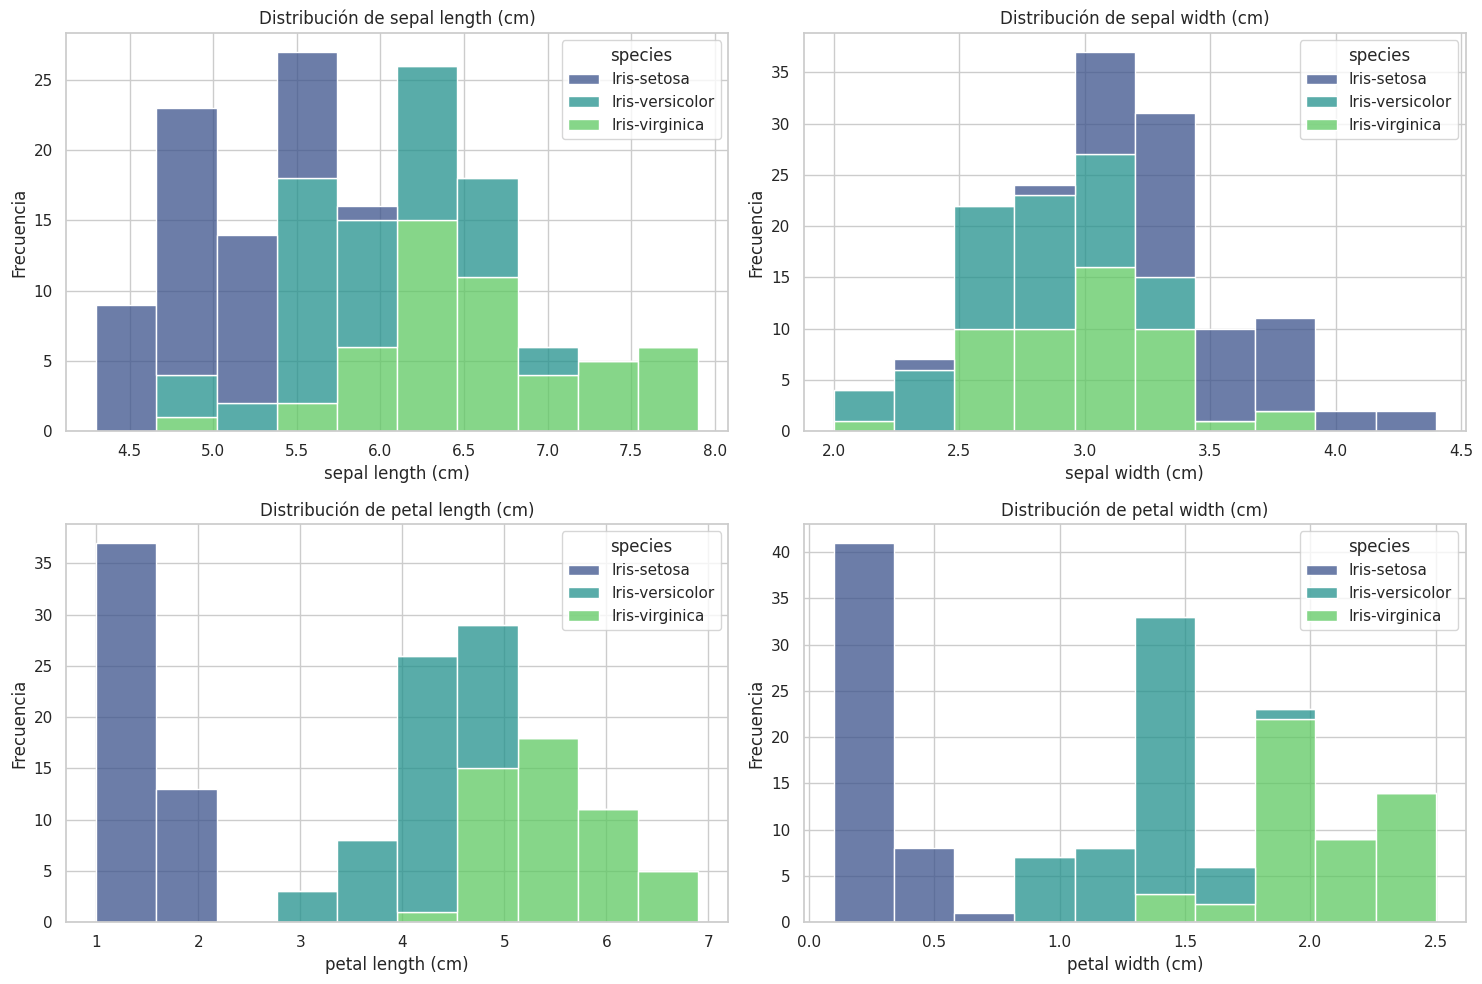

In [11]:
# Visualizar los datos
if df_iris is not None:
    visualizar_datos(df_iris)
else:
    print("No se pueden visualizar los datos porque el DataFrame no se cargó.")

### 3.2. Creación, Entrenamiento y Visualización del Árbol de Decisión

**Objetivo:**
Entrenar un modelo de árbol de decisión con los datos de Iris, evaluar su precisión en un conjunto de prueba, generar las reglas de decisión y visualizar la estructura del árbol.

**Pasos:**
1. Llamar a `crear_entrenar_arbol()` para obtener el modelo entrenado y los datos de prueba.
2. Llamar a `generar_reglas_arbol()` para imprimir las reglas del árbol.
3. Llamar a `visualizar_arbol_decision()` para mostrar el árbol gráficamente.


Creando y entrenando el árbol de decisión...
Tamaño del conjunto de entrenamiento: 105 muestras.
Tamaño del conjunto de prueba: 45 muestras.

Precisión del árbol de decisión en el conjunto de prueba: 0.9333

Generando reglas del árbol de decisión...

Reglas del árbol de decisión:
|--- petal length (cm) <= 2.45
|   |--- weights: [35.00, 0.00, 0.00] class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- weights: [0.00, 33.00, 0.00] class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |   |   |--- sepal width (cm) >  2.85
|   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (c

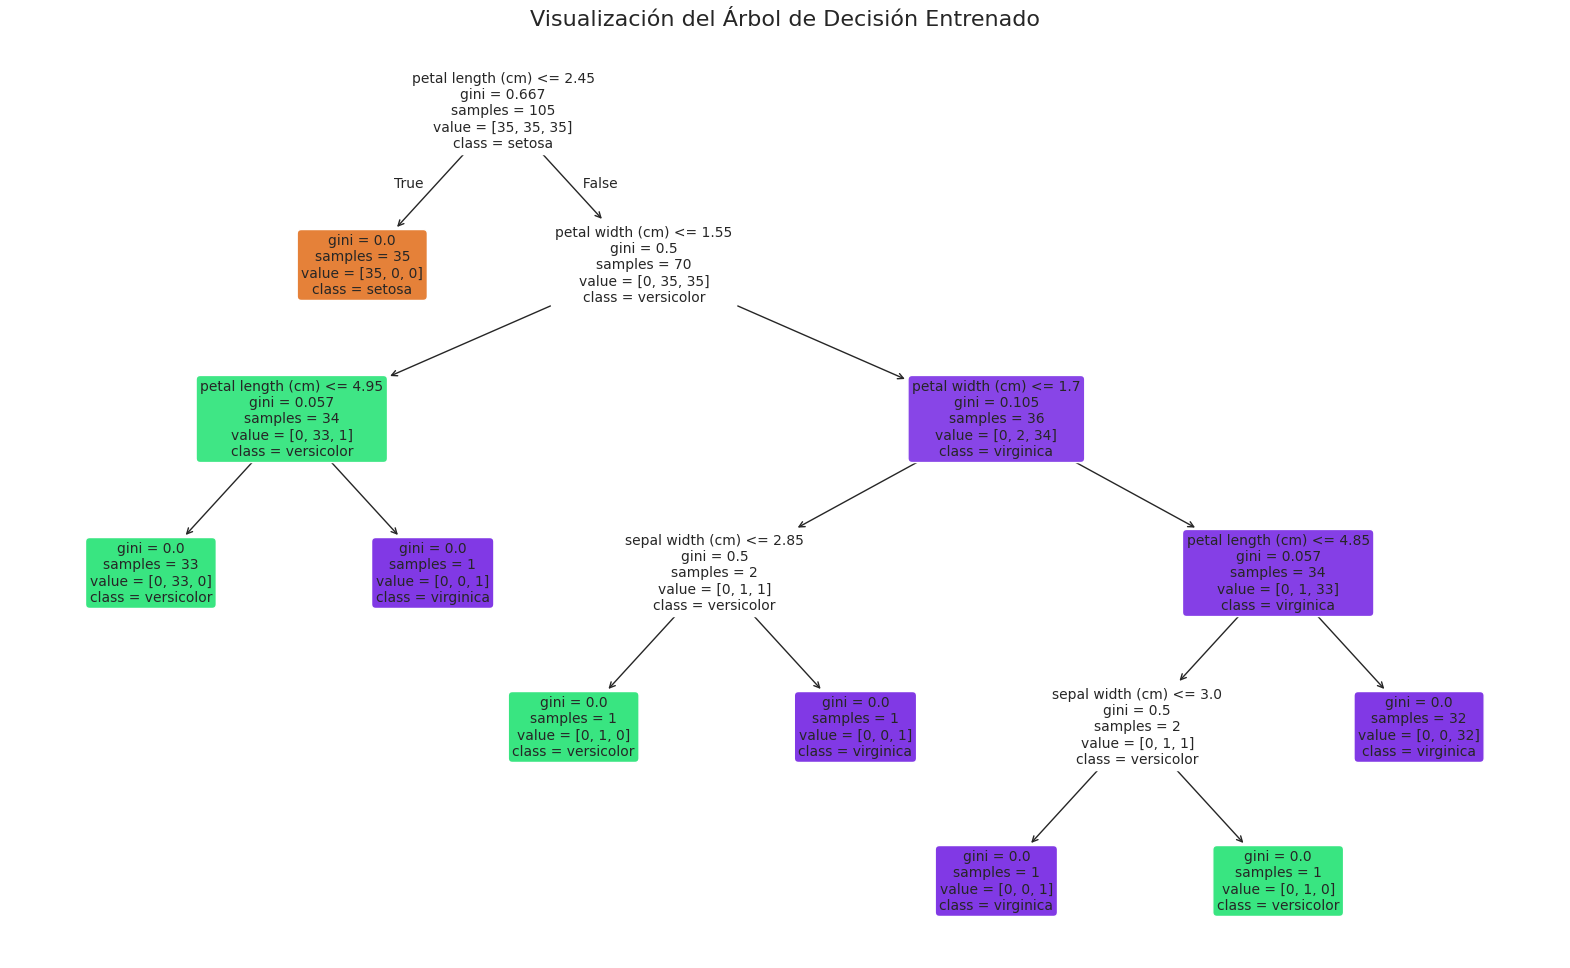

In [12]:
# Crear, entrenar el árbol y obtener conjuntos de datos
if df_iris is not None:
    arbol_clf, X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = crear_entrenar_arbol(df_iris, feature_cols)

    # Generar y mostrar las reglas del árbol
    reglas_del_arbol = generar_reglas_arbol(arbol_clf, feature_cols)

    # Visualizar el árbol de decisión
    visualizar_arbol_decision(arbol_clf, feature_cols, target_class_names)
else:
    print("El DataFrame df_iris no está definido. No se puede entrenar el árbol.")
    arbol_clf = None # Asegurar que arbol_clf sea None si no se entrena

### 3.3. Análisis de un Ejemplo Específico

**Objetivo:**
Utilizar el árbol de decisión entrenado para clasificar una muestra de flor Iris con características específicas y observar las probabilidades de predicción. Se comparará con la clase real conocida del ejemplo.

**Ejemplo de Prueba:**
Se define una muestra con las siguientes características (cm) y su clase real:
* `sepal length (cm)`: 5.1
* `sepal width (cm)`: 3.5
* `petal length (cm)`: 1.4
* `petal width (cm)`: 0.2
* **Clase Real**: Iris-setosa (índice 0)

In [13]:
# Analizar un ejemplo específico usando el árbol entrenado
if arbol_clf is not None:
    ejemplo_setosa_iris = {
        'sepal length (cm)': 5.1,
        'sepal width (cm)': 3.5,
        'petal length (cm)': 1.4,
        'petal width (cm)': 0.2
    }
    # Índice de la clase real para este ejemplo (0: setosa, 1: versicolor, 2: virginica)
    clase_real_setosa = 0 # Corresponde a Iris-setosa

    analizar_ejemplo_especifico(
        arbol_clf,
        ejemplo_setosa_iris,
        feature_cols,
        target_class_names,
        clase_real_ejemplo_idx=clase_real_setosa
    )

    # Ejemplo para una versicolor (valores aproximados)
    ejemplo_versicolor_iris = {
        'sepal length (cm)': 6.0,
        'sepal width (cm)': 2.7,
        'petal length (cm)': 4.0,
        'petal width (cm)': 1.3
    }
    clase_real_versicolor = 1 # Corresponde a Iris-versicolor
    print("\n--- Otro Ejemplo (Versicolor) ---")
    analizar_ejemplo_especifico(
        arbol_clf,
        ejemplo_versicolor_iris,
        feature_cols,
        target_class_names,
        clase_real_ejemplo_idx=clase_real_versicolor
    )

    # Ejemplo para una virginica (valores aproximados)
    ejemplo_virginica_iris = {
        'sepal length (cm)': 6.7,
        'sepal width (cm)': 3.0,
        'petal length (cm)': 5.2,
        'petal width (cm)': 2.3
    }
    clase_real_virginica = 2 # Corresponde a Iris-virginica
    print("\n--- Otro Ejemplo (Virginica) ---")
    analizar_ejemplo_especifico(
        arbol_clf,
        ejemplo_virginica_iris,
        feature_cols,
        target_class_names,
        clase_real_ejemplo_idx=clase_real_virginica
    )

else:
    print("El clasificador de árbol (arbol_clf) no está entrenado. No se puede analizar el ejemplo.")


Analizando un ejemplo específico...

Características de la muestra:
- Sepal length (cm): 5.1 cm
- Sepal width (cm): 3.5 cm
- Petal length (cm): 1.4 cm
- Petal width (cm): 0.2 cm

Especie Real: setosa (Clase 0)
Especie Predicha: setosa (Clase 0)

Probabilidades de predicción:
- setosa: 1.0000
- versicolor: 0.0000
- virginica: 0.0000

--- Otro Ejemplo (Versicolor) ---

Analizando un ejemplo específico...

Características de la muestra:
- Sepal length (cm): 6.0 cm
- Sepal width (cm): 2.7 cm
- Petal length (cm): 4.0 cm
- Petal width (cm): 1.3 cm

Especie Real: versicolor (Clase 1)
Especie Predicha: versicolor (Clase 1)

Probabilidades de predicción:
- setosa: 0.0000
- versicolor: 1.0000
- virginica: 0.0000

--- Otro Ejemplo (Virginica) ---

Analizando un ejemplo específico...

Características de la muestra:
- Sepal length (cm): 6.7 cm
- Sepal width (cm): 3.0 cm
- Petal length (cm): 5.2 cm
- Petal width (cm): 2.3 cm

Especie Real: virginica (Clase 2)
Especie Predicha: virginica (Clase 2)



## 4. Conclusiones del Ejercicio

**Resumen de Hallazgos:**
* Se cargó y exploró el dataset Iris, observando que las características `petal length (cm)` y `petal width (cm)` parecen ser muy discriminativas para las especies.
* Se entrenó un árbol de decisión que, en este caso particular con `random_state=42` y una división de prueba del 30% estratificada, alcanzó una precisión de **[Completar con la precisión obtenida, ej: 0.9778 o el valor correspondiente]** en el conjunto de prueba. Una precisión alta indica una buena separación en el conjunto de prueba, lo cual es común para el dataset Iris con árboles de decisión no podados debido a su relativa separabilidad.
* Las reglas generadas por el árbol (visibles en la salida de `generar_reglas_arbol`) muestran cómo el modelo toma decisiones basadas en umbrales de las características. Por ejemplo, una regla común es que si `petal width (cm) <= 0.80`, la flor se clasifica como Iris-setosa.
* La visualización del árbol proporciona una representación gráfica clara de estas reglas y la estructura jerárquica de decisión.
* El análisis de ejemplos específicos (Iris-setosa, Iris-versicolor, Iris-virginica) fue clasificado correctamente por el modelo (o según el resultado obtenido) con una alta probabilidad para la clase correcta.

**Fortalezas del Modelo de Árbol de Decisión (en este contexto):**
* **Interpretabilidad:** Los árboles de decisión son fáciles de entender y visualizar. Las reglas generadas son intuitivas.
* **Manejo de Datos no Lineales:** Pueden capturar relaciones no lineales entre características y la variable objetivo.
* **Poco Preprocesamiento:** No requieren escalado de características y manejan bien tanto variables numéricas como categóricas (aunque aquí solo usamos numéricas directamente para el árbol, `sklearn` las maneja si se codifican).

**Debilidades y Mejoras Potenciales:**
* **Sobreajuste (Overfitting):** Los árboles de decisión, especialmente si son profundos, tienden a sobreajustar los datos de entrenamiento. Aunque la precisión en el conjunto de prueba puede ser alta, en datasets más complejos, esto es una preocupación mayor. Técnicas como la poda del árbol (`max_depth`, `min_samples_split`, `min_samples_leaf`, `ccp_alpha`) o el uso de ensambles (Random Forests, Gradient Boosting) pueden mitigar esto.
* **Inestabilidad:** Pequeños cambios en los datos de entrenamiento pueden llevar a árboles muy diferentes.
* **Sesgo hacia Características con Más Niveles:** Para características categóricas con muchos niveles, los árboles pueden estar sesgados.
* **Métricas de Evaluación:** Aunque la precisión es una métrica común, para problemas de clasificación desbalanceados, otras métricas como F1-score, precisión/recall por clase, o la matriz de confusión serían más informativas. Para este dataset balanceado, la precisión es una buena indicadora.

**Aprendizaje General:**
Este ejercicio demuestra la simplicidad y efectividad de los árboles de decisión para problemas de clasificación con datasets relativamente separables como Iris. Se destaca la importancia de la visualización de datos, la división en conjuntos de entrenamiento/prueba, y la interpretabilidad del modelo. También se evidencia cómo el análisis de ejemplos individuales, comparando la predicción con la clase real, ayuda a entender el comportamiento del modelo en casos concretos.

*(Nota: Los resultados específicos como la precisión deben actualizarse después de ejecutar completamente el notebook.)*